In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM,Embedding
from tensorflow.keras.models import Model

In [0]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-05-11 09:32:43--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.05s   

2020-05-11 09:32:44 (9.57 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [0]:
!head spam.csv

UnicodeDecodeError: ignored

In [0]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [0]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
 df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
 

In [0]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.columns = ['labels','data']

In [0]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df['b_labels'] = df['labels'].map({'ham':0, 'spam': 1})
Y = df['b_labels'].values

In [0]:
#split up the data
df_train,df_test,Ytrain,Ytest = train_test_split(df['data'],Y,test_size=0.33)


In [0]:
#Convert sentences to sequences

MAX_VOCABS_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCABS_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)


In [0]:
#get word => integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)



Found 7129 unique tokens.


In [0]:
#pad sequence to get n*t matrix

data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

#get sequence length
T = data_train.shape[1]


Shape of data train tensor: (3733, 162)


In [0]:
data_test = pad_sequences(sequences_test)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 180)


In [0]:
#creating the model

D = 20 #Choosing embedding of dimensionality
M = 15 #Choosing hidden state dimensionality]

i = Input(shape=(T,))
x = Embedding(V+1,D)(i) 
#giving V+1 coz index is given more in python eg 99 index is 100
x = LSTM(M, return_sequences= True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i,x)


In [0]:
#compile

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

print('Training model...')
r = model.fit(
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test,Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 8s 68ms/step - loss: 0.4380 - accuracy: 0.8695 - val_loss: 0.4063 - val_accuracy: 0.8586
Epoch 2/10
117/117 [==============================] - 8s 66ms/step - loss: 0.3808 - accuracy: 0.8695 - val_loss: 0.3935 - val_accuracy: 0.8586
Epoch 3/10
117/117 [==============================] - 8s 65ms/step - loss: 0.3531 - accuracy: 0.8695 - val_loss: 0.3383 - val_accuracy: 0.8586
Epoch 4/10
117/117 [==============================] - 8s 65ms/step - loss: 0.2397 - accuracy: 0.8840 - val_loss: 0.2067 - val_accuracy: 0.9581
Epoch 5/10
117/117 [==============================] - 8s 65ms/step - loss: 0.1179 - accuracy: 0.9847 - val_loss: 0.1165 - val_accuracy: 0.9734
Epoch 6/10
117/117 [==============================] - 8s 67ms/step - loss: 0.0577 - accuracy: 0.9922 - val_loss: 0.0880 - val_accuracy: 0.9772
Epoch 7/10
117/117 [==============================] - 8s 65ms/step - loss: 0.0368 - accuracy: 0.9946 - val_loss: 0.0729 - va

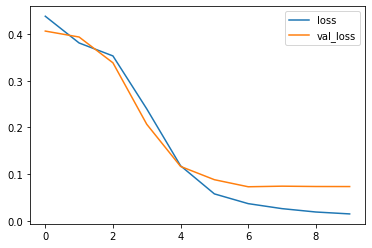

In [0]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

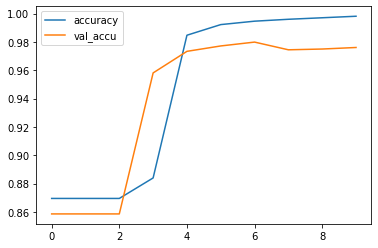

In [0]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accu')
plt.legend()